In [76]:
# input file
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

pickle_in = open("../Data_error/error_2D.pickle","rb")
X = pickle.load(pickle_in)

In [77]:
# trying open first data
X[1]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

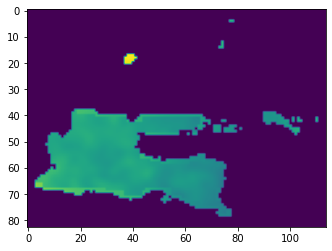

In [78]:
plt.imshow(X[0])

In [79]:
X = np.array(X).reshape(-1,9462)

In [80]:
X.shape

(396, 9462)

In [81]:
df = X
scaler = MinMaxScaler()
scaler.fit(df)
df = scaler.transform(df)

df=df.reshape(-1,83,114)

data_1 = df[:-48]
data_2 = df[:-36]
data_3 = df[:-24]
data_4 = df[:-12]
data_5 = df
df=df[:-60]

In [82]:
train, test = df[:-12], df[-12:]

In [83]:
# adjust input from 3D (1D longitude, 1D latitude, 1D time) to 5D
train = np.array(train).reshape(-1,12,83,114,1)
# X_test = np.array(X_test).reshape(-1,12,83,114,1)

In [84]:
train.shape

(27, 12, 83, 114, 1)

In [85]:
np.array(test).shape

(12, 83, 114)

In [86]:
train[0]

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [87]:
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization

In [88]:
# model ConvLSTM
seq = Sequential()

seq.add(ConvLSTM2D(filters=32, kernel_size=(1, 1), activation='relu',
                   input_shape=(None,83,114,1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=64, kernel_size=(1, 1), activation='relu',
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=114, kernel_size=(1, 1), activation='sigmoid',
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(1, 1, 1),
               activation='relu',
               padding='same', data_format='channels_last'))
seq.compile(loss='mae', optimizer='adam')

In [89]:
seq.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_7 (ConvLSTM2D)  (None, None, 83, 114, 32) 4352      
_________________________________________________________________
batch_normalization_7 (Batch (None, None, 83, 114, 32) 128       
_________________________________________________________________
conv_lst_m2d_8 (ConvLSTM2D)  (None, None, 83, 114, 64) 24832     
_________________________________________________________________
batch_normalization_8 (Batch (None, None, 83, 114, 64) 256       
_________________________________________________________________
conv_lst_m2d_9 (ConvLSTM2D)  (None, None, 83, 114, 114 81624     
_________________________________________________________________
batch_normalization_9 (Batch (None, None, 83, 114, 114 456       
_________________________________________________________________
conv3d_3 (Conv3D)            (None, None, 83, 114, 1) 

In [90]:
seq.fit(train, train, batch_size=1,epochs=3, validation_split=0.1)

Train on 24 samples, validate on 3 samples
Epoch 1/3
24/24 [==============================] - 48s 2s/step - loss: 0.1047 - val_loss: 0.0185
Epoch 2/3
24/24 [==============================] - 46s 2s/step - loss: 0.0202 - val_loss: 0.0185
Epoch 3/3
24/24 [==============================] - 46s 2s/step - loss: 0.0159 - val_loss: 0.0185


In [99]:
# pred_list =[]

# # batch = X_train[-12:].reshape((-1, 12, 83,114,1))
# batch = np.array(X_predict).reshape(-1,12,83,114,1)

pred_list = []

batch = np.array(data_4[-60:-48]).reshape((-1,12,83,114,1))

for i in range(0,12):
    pred_list.append(seq.predict(batch)[0][i])    
    
# batch1 = np.array(data_4[-48:-36]).reshape((-1,12,83,114,1))

# for i in range(0,12):
#     pred_list.append(seq.predict(batch1)[0][i])  
    
# batch2 = np.array(data_4[-36:-24]).reshape((-1,12,83,114,1))

# for i in range(0,12):
#     pred_list.append(seq.predict(batch2)[0][i]) 
    
# batch3 = np.array(data_4[-24:-12]).reshape((-1,12,83,114,1))

# for i in range(0,12):
#     pred_list.append(seq.predict(batch3)[0][i]) 

# batch4 = np.array(data_4[-12:]).reshape((-1,12,83,114,1))

# for i in range(0,12):
#     pred_list.append(seq.predict(batch4)[0][i]) 

In [100]:
pred_list=np.array(pred_list).reshape(-1,9462)
pred_list = scaler.inverse_transform(pred_list)

In [98]:
# pred_list=seq.predict(batch)

# pred_list.shape

(1, 12, 83, 114, 1)

In [101]:
# change dimension
pred_list=pred_list.reshape(-1,83,114)

In [102]:
pred_list.shape

(12, 83, 114)

In [107]:
pred_list[0][82][3]

0.0

In [110]:
import pandas as pd

f= open("data.txt","w+")
for i in range(83):
    for j in range(114):
        f.write(str(pred_list[0][i][j]))
    f.write('\r\n')
        
f.close()

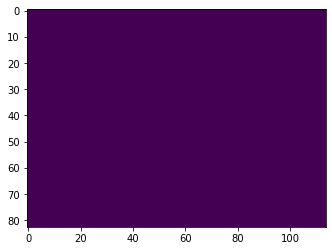

In [111]:
plt.imshow(pred_list[0])

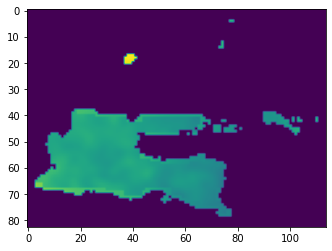

In [59]:
# test=np.squeeze(X_predict[-1:], axis=(4,))
plt.imshow(X[0])

In [49]:
df_asli=X[-60:]
df_asli = np.array(df_asli).reshape(-1,9462)
df_asli[df_asli<5]=0

In [24]:
# MAE untuk semua data
pred_list=np.array(pred_list).reshape(-1,9462)
pred_list[pred_list<10]=0
pred_list_new=[]
df_asli_new=[]
no=0
# for pred in pred_list:
#     pred_list_new.append(list(filter(lambda x: x != 0, pred_list[no])))
#     df_asli_new.append(list(filter(lambda x: x != 0, df_asli[no])))
#     no+=1
    
# pred_list_new=np.array(pred_list_new)
# df_asli_new=np.array(df_asli_new)

mae=[]
no=0
for pred1 in pred_list:
    mae_ = df_asli[no]-pred1
    mae_=(list(filter(lambda x: x != 0, mae_)))
    mae_ = np.average(mae_)
    mae.append(mae_)
    no+=1

In [25]:
mae

[31.334848,
 29.99653,
 29.63623,
 29.085732,
 30.011528,
 29.64352,
 30.82745,
 30.177841,
 29.639706,
 30.32503,
 30.880247,
 31.806211,
 30.669863,
 29.633335,
 29.547937,
 30.052494,
 30.369568,
 30.163286,
 29.766775,
 29.551134,
 28.981064,
 30.152018,
 30.588184,
 31.61113,
 28.717209,
 28.599314,
 29.432047,
 30.333246,
 30.349848,
 30.60727,
 30.426474,
 29.349894,
 30.326189,
 30.782469,
 31.780468,
 30.911684,
 29.445574,
 29.648788,
 30.144518,
 30.066677,
 30.65963,
 30.109915,
 29.599026,
 30.322515,
 30.681152,
 31.80031,
 31.570414,
 30.384956,
 30.645473,
 30.11118,
 30.997614,
 30.653616,
 30.675169,
 30.543276,
 29.918377,
 30.565548,
 30.786732,
 30.653025,
 29.704332,
 29.00742]

In [26]:
from skimage import io
# io.imsave('bulan_.tif', prediksi[0][0])

In [23]:
import pandas as pd
awal = "2012-1"
awal = pd.to_datetime(awal)
from pandas.tseries.offsets import DateOffset
add_dates = [awal + DateOffset(months=x) for x in range(0,60) ]
add_dates

[Timestamp('2012-01-01 00:00:00'),
 Timestamp('2012-02-01 00:00:00'),
 Timestamp('2012-03-01 00:00:00'),
 Timestamp('2012-04-01 00:00:00'),
 Timestamp('2012-05-01 00:00:00'),
 Timestamp('2012-06-01 00:00:00'),
 Timestamp('2012-07-01 00:00:00'),
 Timestamp('2012-08-01 00:00:00'),
 Timestamp('2012-09-01 00:00:00'),
 Timestamp('2012-10-01 00:00:00'),
 Timestamp('2012-11-01 00:00:00'),
 Timestamp('2012-12-01 00:00:00'),
 Timestamp('2013-01-01 00:00:00'),
 Timestamp('2013-02-01 00:00:00'),
 Timestamp('2013-03-01 00:00:00'),
 Timestamp('2013-04-01 00:00:00'),
 Timestamp('2013-05-01 00:00:00'),
 Timestamp('2013-06-01 00:00:00'),
 Timestamp('2013-07-01 00:00:00'),
 Timestamp('2013-08-01 00:00:00'),
 Timestamp('2013-09-01 00:00:00'),
 Timestamp('2013-10-01 00:00:00'),
 Timestamp('2013-11-01 00:00:00'),
 Timestamp('2013-12-01 00:00:00'),
 Timestamp('2014-01-01 00:00:00'),
 Timestamp('2014-02-01 00:00:00'),
 Timestamp('2014-03-01 00:00:00'),
 Timestamp('2014-04-01 00:00:00'),
 Timestamp('2014-05-

In [28]:
len(add_dates)


60

In [29]:
len(Pred_rata)

NameError: name 'Pred_rata' is not defined

In [ ]:
len(df_asli_rata)

In [ ]:
dict = {'bulan': add_dates, 'data ':mae}
df = pd.DataFrame(dict)

In [ ]:
df

In [ ]:
df = df.set_index("bulan")
plt.figure(figsize=(20, 5))
plt.plot(df.index,df)

In [ ]:
dict = {'bulan': add_dates, 'data prediksi':Pred_rata, 'data asli':df_asli_rata}
df = pd.DataFrame(dict)
df


In [ ]:
# df_asli = data_4
df = df.set_index("bulan")
plt.figure(figsize=(20, 5))
plt.plot(df.index, df_asli_rata[-60:], color='b', label="observasi")
plt.plot(df.index, Pred_rata[-60:], color='r', label="prediksi")
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [ ]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(mae, lags=12 , alpha=0.05)
acf.show()

In [ ]:
pacf = smt.graphics.plot_pacf(mae, lags=12 , alpha=0.05)
pacf.show()

In [50]:
from skimage import io
prediksi[prediksi==-1]=-9999

In [51]:
no=0
for pred in prediksi:
    if(add_dates[no].month<10):
        nama_file = 'Raster/'+str(add_dates[no].year)+'0'+str(add_dates[no].month)+'.tif'
    else:
        nama_file = 'Raster/'+str(add_dates[no].year)+str(add_dates[no].month)+'.tif'
            
    io.imsave(nama_file, prediksi[no])
    no+=1
nama_file

c:\users\komputer3\miniconda3\envs\ml1\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Raster/201201.tif is a low contrast image
  


'Raster/201201.tif'

In [23]:
# pickle_out =open("prediksi.pickle",'wb')
# pickle.dump(prediksi[0][0], pickle_out)
# pickle_out.close()